In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#사이킷런 제공하는 캘리포니아 집값 데이터 셋

from sklearn.datasets import fetch_california_housing

In [ ]:
# 캘리포니아 주택 가격 데이터셋 로드
housing = fetch_california_housing()

# 데이터프레임 생성
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['Target'] = housing.target  # 목표 변수 추가

# 데이터프레임의 첫 5행 출력
print(df_housing.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df_housing['Target'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: Target, dtype: float64

In [ ]:
df1 = df_housing[['Target', 'MedInc']]

In [ ]:
df1

,Target,MedInc
0,4.526,8.3252
1,3.585,8.3014
2,3.521,7.2574
3,3.413,5.6431
4,3.422,3.8462
...,...,...
20635,0.781,1.5603
20636,0.771,2.5568
20637,0.923,1.7000
20638,0.847,1.8672


<ipython-input-244-05c813d3d0bc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['MedInc'])


<Axes: xlabel='MedInc', ylabel='Density'>

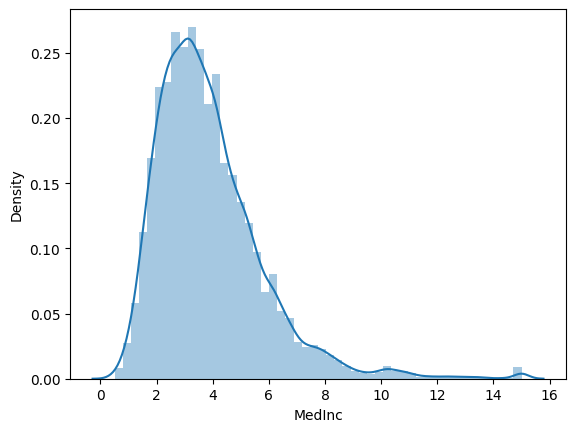

In [ ]:
sns.distplot(df1['MedInc'])

<ipython-input-245-978335ee34ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Target'])


<Axes: xlabel='Target', ylabel='Density'>

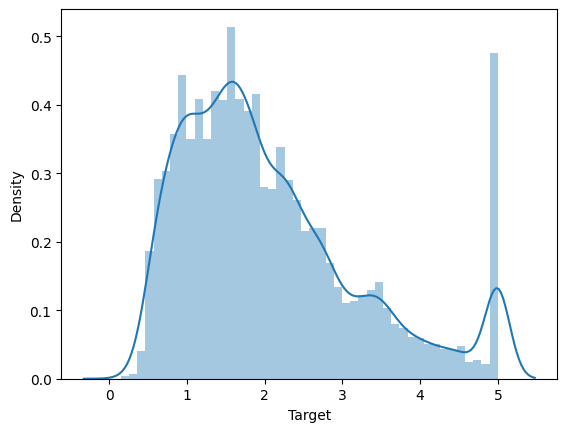

In [ ]:
sns.distplot(df1['Target'])

<Axes: ylabel='Target'>

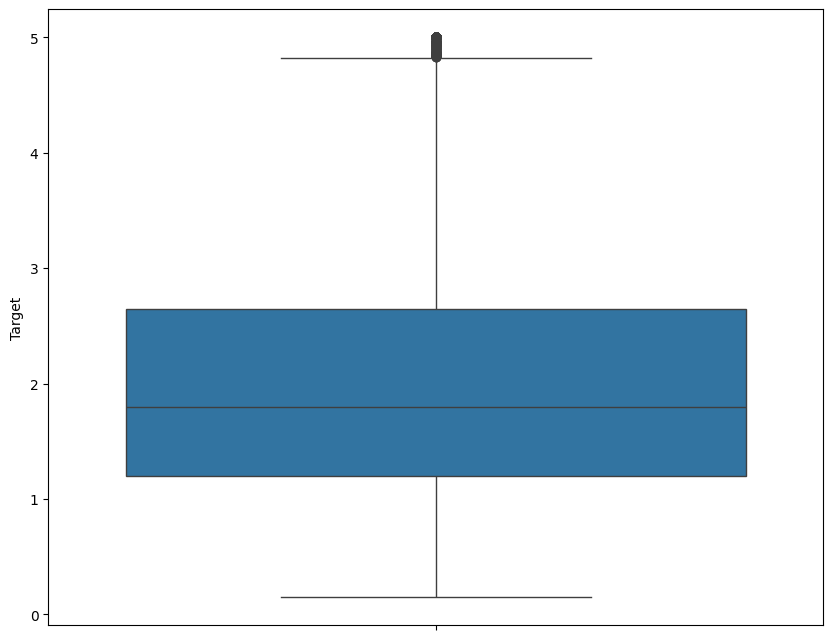

In [ ]:
# 이상치 바라보는 그래프 boxplot

plt.figure(figsize=(10,8))
sns.boxplot(y='Target',data =df_housing)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE

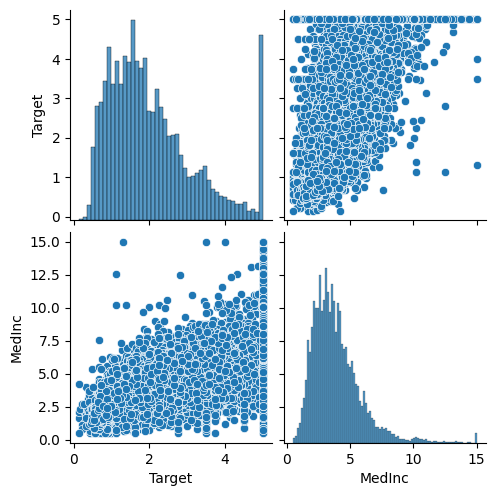

In [ ]:
sns.pairplot(df1[['Target','MedInc']])

In [ ]:
x = df1['MedInc']

y = df1['Target']

In [ ]:
# train_test 분리 나누기


X_train, X_test, y_train, y_test= train_test_split(x,y,train_size=0.7, test_size=0.3)

In [ ]:
print('train 수:',len(X_train))
print('test 수:',len(X_test))

train 수: 14447
test 수: 6192


In [ ]:
# 회귀모델 불러와서 비교 분석하기

mreg = LinearRegression(fit_intercept=True)
mreg.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [ ]:
# 예측값을 보고 변화를 확인할 예정
y_pred1=mreg.predict(np.array(X_test).reshape(-1,1))
y_pred1

array([2.84922036, 1.65394891, 4.19884058, ..., 1.55351965, 2.35339538,
       3.29443303])

In [ ]:
print('R-square:{:.5f}'.format(mreg.score(np.array(X_train).reshape(-1,1), y_train)))
print('R-square:{:.5f}'.format(mreg.score(np.array(X_test).reshape(-1,1), y_test)))
print('RMSE:{:.5f}'.format(mean_squared_error(y_test, y_pred1)))

R-square:0.45989
R-square:0.46670
RMSE:0.69120


In [ ]:
mse1 =
mse1

0.6912039916577838

In [ ]:
df_housing['Target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [ ]:
# Q1, Q3범위 정하기
Q1=df_housing['Target'].quantile(0.25)
Q3=df_housing['Target'].quantile(0.75)
IQR = Q3- Q1 # IQR값 계산
rev_range=1.1 # 범위조절변수

In [ ]:
# 이상치 범위 설정
filter=(df_housing['Target']>=Q1-rev_range*IQR) &(df_housing['Target']<=Q3+rev_range*IQR)

In [ ]:
df_rm=df_housing.loc[filter]

In [ ]:
df_housing['Target'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: Target, dtype: float64

In [ ]:
df_rm['Target'].describe()

count    19134.000000
mean         1.849731
std          0.880626
min          0.149990
25%          1.148000
50%          1.704000
75%          2.403750
max          4.240000
Name: Target, dtype: float64

<Axes: ylabel='Target'>

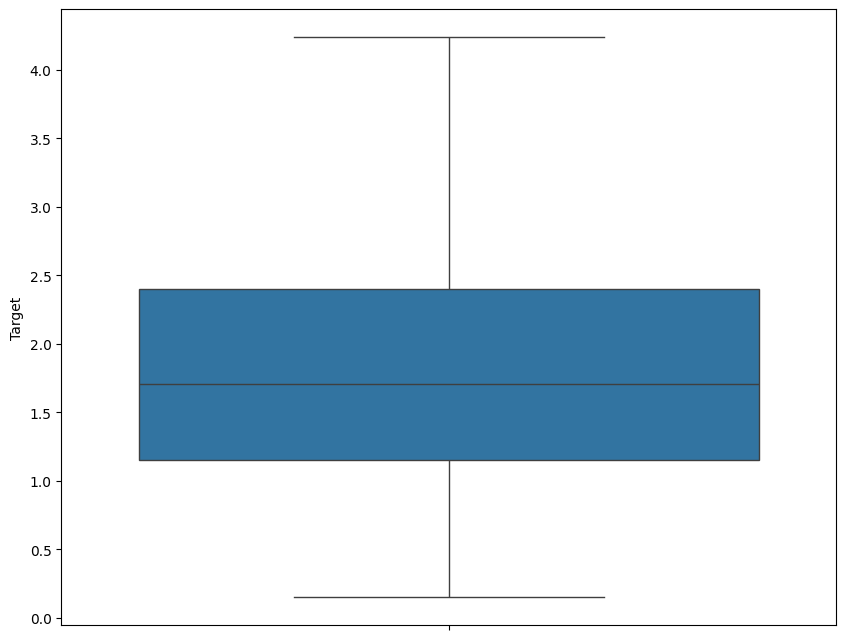

In [ ]:
# 이상치 바라보는 그래프 boxplot

plt.figure(figsize=(10,8))
sns.boxplot(y='Target',data =df_rm)

In [ ]:
df2 = df_rm[['Target','MedInc']]
df2

,Target,MedInc
1,3.585,8.3014
2,3.521,7.2574
3,3.413,5.6431
4,3.422,3.8462
5,2.697,4.0368
...,...,...
20635,0.781,1.5603
20636,0.771,2.5568
20637,0.923,1.7000
20638,0.847,1.8672


<ipython-input-317-5ca71e9e7393>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Target'])


<Axes: xlabel='Target', ylabel='Density'>

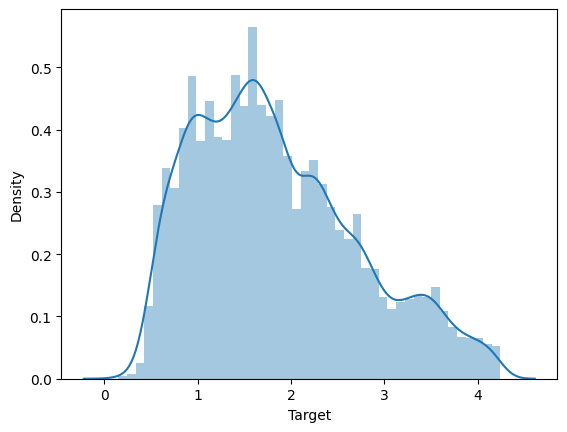

In [ ]:
sns.distplot(df2['Target'])

<ipython-input-286-9128f8d5c21b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['MedInc'])


<Axes: xlabel='MedInc', ylabel='Density'>

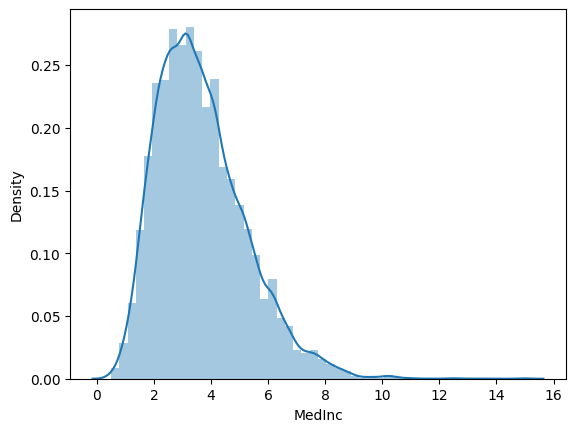

In [ ]:
sns.distplot(df2['MedInc'])

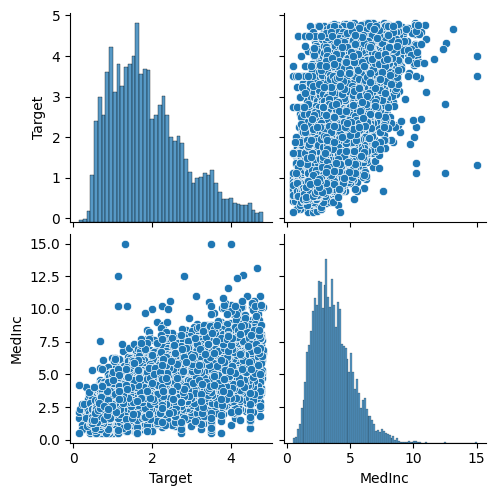

In [ ]:
sns.pairplot(df2[['Target','MedInc']])

In [ ]:
x2 = df2['MedInc']
y2 = df2['Target']

In [ ]:
X_train2, X_test2, y_train2, y_test2= train_test_split(x2,y2,train_size=0.7, test_size=0.3)

In [ ]:
print('train 수:',len(X_train2))
print('test 수:',len(X_test2))

In [ ]:
# 회귀모델 불러와서 비교 분석하기

mreg = LinearRegression(fit_intercept=True)
mreg.fit(np.array(X_train2).reshape(-1,1),y_train2)

In [ ]:
y_pred2=mreg.predict(np.array(X_test2).reshape(-1,1))
y_pred2

array([1.00132677, 1.41491337, 2.52329542, ..., 1.4831787 , 2.65974696,
       1.87046377])

In [ ]:
print('R-square:{:.5f}'.format(mreg.score(np.array(X_train2).reshape(-1,1), y_train2)))
print('R-square:{:.5f}'.format(mreg.score(np.array(X_test2).reshape(-1,1), y_test2)))
mse2 = mean_squared_error(y_test2, y_pred2)
print('RMSE : {:.5f}'.format(mse2))

R-square:0.41441
R-square:0.41365
RMSE : 0.53532


RMSE : 0.53532


In [ ]:
# Q1, Q3범위 정하기
Q1=df_rm['Target'].quantile(0.25)
Q3=df_rm['Target'].quantile(0.75)
IQR = Q3- Q1 # IQR값 계산
rev_range=1.5 # 범위조절변수

# 이상치 범위 설정
filter=(df_rm['Target']>=Q1-rev_range*IQR) &(df_rm['Target']<=Q3+rev_range*IQR)

df_rm2=df_rm.loc[filter]

df3 = df_rm2[['Target','MedInc']]

x3 = df3['MedInc']
y3 = df3['Target']

X_train3, X_test3, y_train3, y_test3= train_test_split(x3,y3,train_size=0.7, test_size=0.3)

# 회귀모델 불러와서 비교 분석하기
mreg = LinearRegression(fit_intercept=True)
mreg.fit(np.array(X_train3).reshape(-1,1),y_train3)

y_pred3=mreg.predict(np.array(X_test3).reshape(-1,1))

print('R-square:{:.5f}'.format(mreg.score(np.array(X_train3).reshape(-1,1), y_train3)))
print('R-square:{:.5f}'.format(mreg.score(np.array(X_test3).reshape(-1,1), y_test3)))
print('RMSE:{:.5f}'.format(mean_squared_error(y_test3, y_pred3)))

R-square:0.41720
R-square:0.40345
RMSE:0.49217


<Axes: ylabel='Target'>

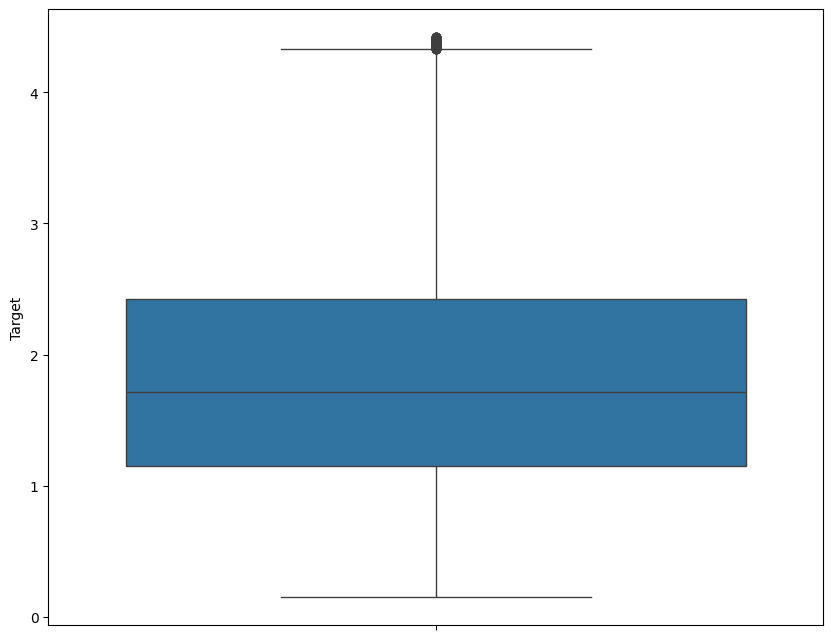

In [ ]:
# 이상치 바라보는 그래프 boxplot

plt.figure(figsize=(10,8))
sns.boxplot(y='Target',data =df_rm2)

<ipython-input-307-9cfee234938f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['MedInc'])


<Axes: xlabel='MedInc', ylabel='Density'>

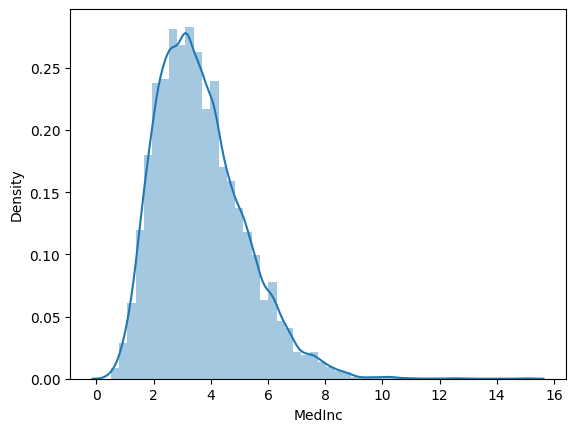

In [ ]:
sns.distplot(df3['MedInc'])

<ipython-input-308-a2c35f0da019>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Target'])


<Axes: xlabel='Target', ylabel='Density'>

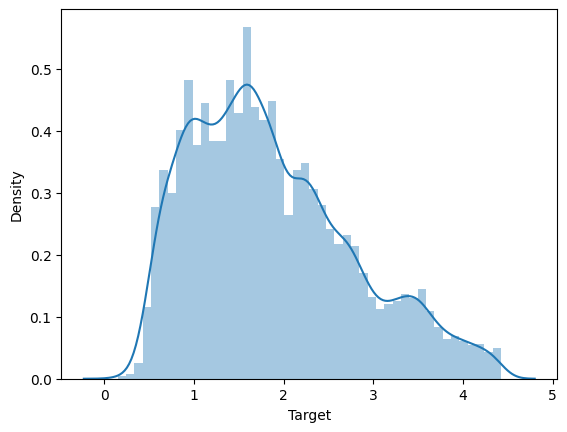

In [ ]:
sns.distplot(df3['Target'])

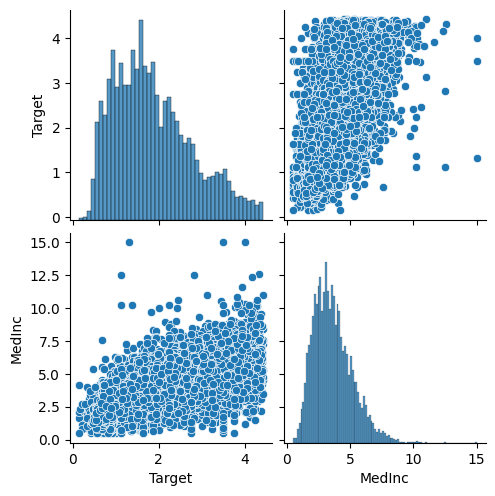

In [ ]:
sns.pairplot(df3[['Target','MedInc']])

# rev_range = 1.5

<초기설정>
R-square:0.45989
R-square:0.46670
RMSE:0.69120

<이상치 제거1>
R-square:0.41441
R-square:0.41365
RMSE : 0.53532

<이상치 제거2>
R-square:0.41720
R-square:0.40345
RMSE:0.49217

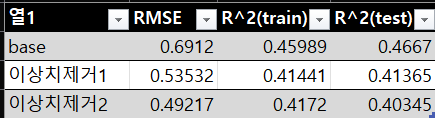

# rev_range = 1.1
<이상치 제거1>
R-square:0.40910
R-square:0.40929
RMSE : 0.46246

<이상치 제거2>
R-square:0.38532
R-square:0.39785
RMSE:0.40908

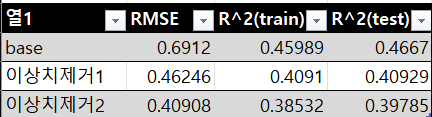

일반적으로 이상치를 제거할 경우 RMSE와 R-Squared값은 더욱 좋아져야 한다. 하지만 rev_range값을 줄여 이상치를 더 많이 제거하거나 이상치 제거를 반복적으로 수행할 수록 성능이 더욱 낮아지는 것을 볼 수 있었다.

이는 이상치가 중요할 역할을 하고 있거나 이상치를 없애게 되어 과소적합을 유발했을 가능성이 있다고 볼 수 있다.